In [1]:
import pandas as pd
import numpy as np
from ltp_method import LtpParser
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lzh\AppData\Local\Temp\jieba.cache
Loading model cost 0.702 seconds.
Prefix dict has been built successfully.


In [2]:
df=pd.read_csv("泰迪第三题含有相似度.csv",engine='python')
df.head()

,留言编号,留言用户,留言主题,留言时间,留言详情,答复意见,答复时间,相关性,答复意见主题,留言详情主题,可解释性
0,2549,A00045581,A2区景蓉华苑物业管理有问题,2019/4/25 9:32,2019 年 位于 市 A2 区 桂花 坪 街道 A2 区 公安分局 宿舍区 景蓉华苑 乱象...,现将 网友 在 平台 《 问政 西地省 》 栏目 向 胡华衡 书记 留言 反映 A2 区景蓉...,2019/5/10 14:56,0.909506,10201927a2三分之二下午业主业主大会业委会书记了解代表价格会议住房依法依规信任停车关...,064202019423a2一再一吨一度不知业主业主大会业委会买水乱象人员以交位于何来何种保...,0.952922
1,2554,A00023583,A3区潇楚南路洋湖段怎么还没修好？,2019/4/24 16:03,潇楚 南路 2018 年 修 一年 路 挖 稀烂 围栏 围 动工 有时候 来台 挖机 挖 两...,网友 A00023583 您好 针对 您 反映 A3 区潇楚 南路 洋湖 段 怎么 还 没 ...,2019/5/9 9:49,0.916171,2019295075a00023583a3三趟今年保证修好关心力量加之区洋湖区潇楚南路原有反...,2018一个圈一年一段交通修好几下几天出行动工南路围栏外面对此带来店面影响很大挖机时间有时候...,0.908247
2,2555,A00031618,请加快提高A市民营幼儿园老师的待遇,2019/4/24 15:40,地处 省会市 民营 幼儿园 众多 小孩 祖国 未来 民营 幼儿园 教师 超负荷 工作 收入 ...,市民 同志 你好 您 反映 的 请 加快 提高 民营 幼儿园 教师 的 待遇 的 来信 已 ...,2019/5/9 9:49,0.919710,2019一是中共为了二是人事人民政府企业住房你好依法保险保障做出公办公积金关于关注养老保险出...,众多倡导养老加大加快医疗压力喘气国家地处增加学生小孩工作工资待遇市委市政府希望幼儿园提高收入...,0.903513
3,2557,A000110735,在A市买公寓能享受人才新政购房补贴吗？,2019/4/24 15:07,尊敬 书记 您好 研究生 毕业 人才 新政 落户 市想 买套 公寓 请问 购买 公寓 享受 ...,网友 A000110735 您好 您 在 平台 《 问政 西地省 》 上 的 留言 已 收悉...,2019/5/9 9:49,0.902263,00000000000020193035a000110735万元不可事业单位交由人才以上以下...,万元书记买套享受人才公寓尊敬市想您好新政毕业研究生落户补贴请问谢谢购买购房,0.840684
4,2574,A0009233,关于A市公交站点名称变更的建议,2019/4/23 17:03,建议 白竹坡 路口 更名 马坡岭 小学 原马坡 岭 小学 取消 保留 马坡岭,网友 A0009233 您好 您 的 留言 已 收悉 现将 具体内容 答复 如下 关于 来信...,2019/5/9 9:51,0.889347,2019a0009233三处不宜使用保留公交站公交站点公交线路公共交通关于关心具体内容出行原...,保留原马坡取消小学建议更名白竹坡路口马坡岭,0.929337


## 完整性评价
   * 对句子成分分析 主谓宾定状补+介宾

In [3]:
ltp=LtpParser()
scores=[]

for reply in range(len(df.答复意见)):
    words,arcs=ltp.analysis(df.答复意见[reply])
    dicts={}
    for i in arcs:
        dicts[i.relation]=1
    part1=['SBV','ATT','ADV','CMP','POB','HED']#除宾语外的部分
    part2=['VOB','IOB','FOB']#宾语
    score=0
    step=1/7#一共七种主要成分,每种成分所占分值
    #获取每个词的成分
    keys=dicts.keys()
    for j in keys:
        if j in part1:
            score+=step
        elif j in part2:
            score+=step
    scores.append(score)
    print("\r{:.2f}%".format((reply+1)/len(df)*100),end="")

100.00%

## 计算答复意见评分

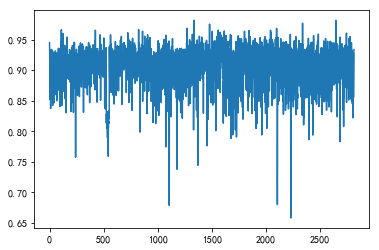

In [24]:
df['完整性']=scores
df['答复意见评分']=df['相关性']*0.4+df['可解释性']*0.4+df['完整性']*0.2
res=df[['相关性','可解释性','完整性','答复意见评分']]
res.to_csv("第三题_结果数据.csv")